In [496]:
#!/usr/bin/env python
%matplotlib inline

from PyOPC.OPCContainers import *
from PyOPC.XDAClient import XDAClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import time, datetime

from sqlalchemy import create_engine # database connection

In [497]:
def print_options((ilist,options)):
    print ilist; print options; print
 

In [498]:
address=''
%run 'address'  #lese geheime address='http://ip-number:port'


In [499]:
#Vorher braucht es eine VPN-Verindung zur Windenergieanlage
xda = XDAClient(OPCServerAddress=address,
                ReturnErrorText=True)

print_options(xda.GetStatus())


[]
{'RcvTime': datetime.datetime(2016, 2, 24, 22, 18, 46), 'SupportedInterfaceVersions': ['XML_DA_Version_1_0'], 'ClientRequestHandle': 'ZSI_XfCCakjoyy_GetStatus', 'VendorInfo': 'Enercon SCADA OPC XML DA', 'ReplyTime': datetime.datetime(2016, 2, 24, 22, 18, 46), 'StatusInfo': 'The server is running normally.', 'ProductVersion': 'V1.00', 'StartTime': datetime.datetime(2015, 12, 18, 10, 5, 35), 'SupportedLocaleIDs': ['en-us'], 'RevisedLocaleID': 'en-us', 'ServerState': 'running'}



In [541]:
disk_engine = create_engine('sqlite:///egneos2.db')

In [548]:
lastTS=pd.read_sql_query('SELECT max("index") FROM Wecstd_Raw LIMIT 1', disk_engine).values[0][0]
lastTS=datetime.datetime.strptime(lastTS, "%Y-%m-%d %H:%M:%S.%f")
lastTS

datetime.datetime(2016, 2, 26, 20, 59)

In [502]:
jetzt=xda.Read([ItemContainer(ItemName='Loc/Wec/Plant2/P')],ReturnItemTime=True)[0][0].Timestamp

In [503]:
jetzt,jetzt.year,jetzt.month,jetzt.day,jetzt.isocalendar()[1]#,datetime.week(now)

(datetime.datetime(2016, 2, 24, 21, 20, 59), 2016, 2, 24, 8)

In [504]:
ddays=jetzt.day-lastTS.day
ddays

12

In [505]:
dhours=(jetzt.hour-lastTS.hour)+24*ddays
dhours

292

In [506]:
item = ItemContainer(ItemName='Loc/Wec/Plant2/P', MaxAge=500)
P=xda.Read(item)[0][0].Value

In [507]:
P #Leistung in KiloWatt

553

In [578]:
first_path='Loc/Wec/Plant2/Log'
Folders=['Wecstd','T101a1','T101a2']#,          'Ava']
#logs={'':}

In [509]:
Wecstd_descRawRepDay=[
u'Timestamp',   
u'Source',    
u'Anzahl der Abtastwerte',
u'Mittlere Windgeschw. [m/s]',
u'Maximale Windgeschw. [m/s]',
u'Minimale Windgeschw. [m/s]',
u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]',
u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]',
u'Gondelposition [º]',
u'Betriebsstunden [h]',
u'Produzierte Energie [kWh]',
u'Produktionsminuten [min]',
u'Mittlere Blindleistung [kVar]',
u'Maximale Blindleistung [kVar]',
u'Minimale Blindleistung [kVar]',
u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',
u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',
u'Mittelwert der maximal verfügbaren Wirkleistung begrenzt durch höhere Gewalt [kW]',
u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]',
u'Mittelwert Blattwinkel über A, B, C [°]','?1','?2','?3','?4','?5','?6','?7','?8'
]

Wecstd_descWeekMonthYear=[
u'Timestamp',    
u'Source', 
u'Anzahl der Abtastwerte',
u'Mittlere Windgeschw. [m/s]',
u'Maximale Windgeschw. [m/s]',

u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',

u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',


u'Betriebsstunden [h]',
u'Produzierte Energie [kWh]',
u'Produktionsminuten [min]',
u'Mittlere Blindleistung [kVar]',
u'Maximale Blindleistung [kVar]',
u'Minimale Blindleistung [kVar]',
u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',
u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',
u'Mittelwert der maximal verfügbaren Wirkleistung begrenzt durch höhere Gewalt [kW]',
u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]'
]

In [616]:
Wecstd_descRawRepDayshort=[
u'index',   
u'Source',    
u'Values',
u'MitVwind',
u'MaxVwind',
u'MinVwind',
u'MitNRotor',
u'MaxNRotor',
u'MinNRotor',
u'MitP',
u'MaxP',
u'MinP',
u'GoPos',
u'Hour',
u'Wexp',
u'Minutes',
u'MitQ',
u'MaxQ',
u'MinQ',
u'PavaVwind',
u'PavaTech',
u'PavaForceM',
u'PavaExtern',
u'Pitch','?1','?2','?3','?4','?5','?6','?7','?8'
]

Wecstd_descWeekMonthYearshort=[
u'index',   
u'Source',    
u'numberOfValues',
u'MitVwind',
u'MaxVwind',

u'MitNRotor',
u'MaxNRotor',

u'MitP',
u'MaxP',


u'Hour',
u'Wexp',
u'Minutes',
u'MitQ',
u'MaxQ',
u'MinQ',
u'PavaVwind',
u'PavaTech',
u'PavaForceM',
u'PavaExtern'
]

T101a1_descshort=[u'index', u'Source', 'Values','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10',
                               'T11','T12','T13','T14','T15','T16','T17','T18','T19','T20',
                                'T21','T22','T23','T24','T25']    

T101a2_descshort=[u'index',u'Source', 'Values','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10',
                               'T11','T12','T13','T14']                                                                 

In [614]:
def catchit(p,Tscales_str,numbers,descr):
    itemcollect=[]
    for i in xda.Browse(ItemName=os.path.join(p,Tscales_str),MaxElementsReturned=850)[0][:]:
        if not i.HasChildren and i.Name.startswith("Val-"):
            
            if int(i.Name.rsplit('-', 1)[1])<=numbers:
                ii = ItemContainer(ItemName=os.path.join(p,Tscales_str,i.Name))
                #print i.Name,
                itemcollect.append(ii)
    #print itemcollect
    if not itemcollect:
        return
    all=xda.Read(itemcollect,ReturnItemTime=True)
    log=[]
    x=0
    for i in all[0]:
        #i.Name=str.replace(i.ItemName,path+"/","")
        datafield=np.hstack((i.Timestamp,Tscales_str,i.Value))
        #print i.Value
        log.append(datafield)
        x=x+1
    log_df=pd.DataFrame(data=log[::-1],columns=descr)
    
    log_df.index=log_df['index']
    log_df.drop('index', axis=1, inplace=True)    
        
    return log_df    
    

In [622]:
itemcollect=[] 
for F in Folders:
    p=os.path.join(first_path,F)
    print p
    for Tscales in xda.Browse(ItemName=p)[0][:]:
        if Tscales.HasChildren:
            Tscales_str=Tscales.ItemName.rsplit('/', 1)[1]
            T = ItemContainer(ItemName=os.path.join(p,Tscales.Name))
            itemcollect.append(T)
            print Tscales_str
            try:
                lastTS=pd.read_sql_query('SELECT max("index") FROM '+F+"_"+Tscales_str+' LIMIT 1', disk_engine).values[0][0]
                lastTS=datetime.datetime.strptime(lastTS, "%Y-%m-%d %H:%M:%S.%f")
            except:
                lastTS=datetime.datetime(1990, 1, 1, 1, 0, 0)
            now=xda.Read([ItemContainer(ItemName='Loc/Wec/Plant2/P')],ReturnItemTime=True)[0][0].Timestamp
            diff=now-lastTS
            
            if (Tscales_str=='Raw') or (Tscales_str=='Rep'):
                sampletime=xda.Read([ItemContainer(ItemName=os.path.join(p,str(Tscales_str+"SmpTime")))],ReturnItemTime=True)[0][0].Value
                print sampletime,Tscales_str,os.path.join(p,Tscales_str,str(Tscales_str+"SmpTime"))
                num=(now-lastTS).total_seconds()/sampletime
                
            if (Tscales_str=='Day'):
                num=(now-lastTS).days+(now.year-lastTS.year)*365-1
                print now,lastTS,"Num: ",num
            if (Tscales_str=='Week'):    
                num=now.isocalendar()[1]-lastTS.isocalendar()[1]+(now.year-lastTS.year)*53-1
            if (Tscales_str=='Month'):
                num=(now.month-lastTS.month)+(now.year-lastTS.year)*12-1
            if (Tscales_str=='Year'):
                num=(now.year-lastTS.year)-1
            print "Num: ",num    
            noVal=xda.Read([ItemContainer(ItemName=os.path.join(p,Tscales_str,"NoVal"))],ReturnItemTime=True)[0][0].Value
            numbers=min(num,noVal)
            print "Numbers: ",numbers  
            #Description selector
            if F=="Wecstd":
                if (Tscales_str=='Raw') or (Tscales_str=='Rep') or (Tscales_str=='Day'):
                    descr=Wecstd_descRawRepDayshort
                else:
                    descr=Wecstd_descWeekMonthYearshort
            if F=="T101a1":
                descr=T101a1_descshort
            if F=="T101a2":
                descr=T101a2_descshort

            if numbers>0:
                df=catchit(p,Tscales_str,numbers,descr)
                
                if not df.empty:
                    df.to_sql(F+"_"+Tscales_str, disk_engine, if_exists='append')
            

Loc/Wec/Plant2/Log/Wecstd
Raw
60 Raw Loc/Wec/Plant2/Log/Wecstd/Raw/RawSmpTime
Num:  235.183333333
Numbers:  235.183333333
Rep
600 Rep Loc/Wec/Plant2/Log/Wecstd/Rep/RepSmpTime
Num:  23.5633333333
Numbers:  23.5633333333
Day
2016-03-02 21:45:55 2016-03-01 00:00:00 Num:  0
Num:  0
Numbers:  0
Week
Num:  0
Numbers:  0
Month
Num:  0
Numbers:  0
Year
Num:  0
Numbers:  0
Loc/Wec/Plant2/Log/T101a1
Raw
60 Raw Loc/Wec/Plant2/Log/T101a1/Raw/RawSmpTime
Num:  235.3
Numbers:  60
Rep
600 Rep Loc/Wec/Plant2/Log/T101a1/Rep/RepSmpTime
Num:  23.6633333333
Numbers:  23.6633333333
Day
2016-03-02 21:46:56 2016-03-01 00:00:00 Num:  0
Num:  0
Numbers:  0
Loc/Wec/Plant2/Log/T101a2
Raw
60 Raw Loc/Wec/Plant2/Log/T101a2/Raw/RawSmpTime
Num:  235.083333333
Numbers:  60
Rep
600 Rep Loc/Wec/Plant2/Log/T101a2/Rep/RepSmpTime
Num:  23.7383333333
Numbers:  23.7383333333
Day
2016-03-02 21:47:39 2016-03-01 00:00:00 Num:  0
Num:  0
Numbers:  0


In [583]:
for i in xda.Browse(ItemName='Loc/Wec/Plant2/Log/T101a1')[0][:]:
    print i.Name,i.HasChildren

RawSmpTime False
Raw True
RepSmpTime False
Rep True
Day True


In [584]:
for i in xda.Browse(ItemName='Loc/Wec/Plant2/Log/T101a1/Raw')[0][:]:
    print i.Name,i.HasChildren

NoVal False
Val-1 False
Val-2 False
Val-3 False
Val-4 False
Val-5 False
Val-6 False
Val-7 False
Val-8 False
Val-9 False
Val-10 False
Val-11 False
Val-12 False
Val-13 False
Val-14 False
Val-15 False
Val-16 False
Val-17 False
Val-18 False
Val-19 False
Val-20 False
Val-21 False
Val-22 False
Val-23 False
Val-24 False
Val-25 False
Val-26 False
Val-27 False
Val-28 False
Val-29 False
Val-30 False
Val-31 False
Val-32 False
Val-33 False
Val-34 False
Val-35 False
Val-36 False
Val-37 False
Val-38 False
Val-39 False
Val-40 False
Val-41 False
Val-42 False
Val-43 False
Val-44 False
Val-45 False
Val-46 False
Val-47 False
Val-48 False
Val-49 False
Val-50 False
Val-51 False
Val-52 False
Val-53 False
Val-54 False
Val-55 False
Val-56 False
Val-57 False
Val-58 False
Val-59 False
Val-60 False


In [597]:
item_T = ItemContainer(ItemName='Loc/Wec/Plant2/Log/T101a2/Day/Val-1', MaxAge=500)
all=xda.Read([item_T])[0][0]
print len(all.Value)

15


In [581]:
df=catchit(p,'Raw',2,Wecstd_descRawRepDay)

KeyError: 'index'

In [531]:
df.dtypes

AttributeError: can't set attribute

In [459]:
item_Vwind = ItemContainer(ItemName='Loc/Wec/Plant2/Vwind', MaxAge=500)
item_P = ItemContainer(ItemName='Loc/Wec/Plant2/P', MaxAge=500)
all=xda.Read([item_Vwind,item_P])[0]

In [460]:
print (str(all[0].Value) + ' m/s Windgeschwindigkeit ')
print (str(all[1].Value) + ' kW Leistung')

11.6 m/s Windgeschwindigkeit 
2543 kW Leistung


In [461]:
for i in xda.Browse(ItemName='Loc')[0][:]:
    print i.Name,i.HasChildren

LocNo False
LocName False
NoPlant False
Wec True
Ctrl True


In [462]:
path='Loc/Wec/Plant2'
itemcollect=[]
data={}
for i in xda.Browse(ItemName=path)[0][:]:
    #print i.Name
    if not i.HasChildren:
        i = ItemContainer(ItemName=path+"/"+i.Name)
        itemcollect.append(i)
#print itemcollect

%time all=xda.Read(itemcollect)
data['Timestamp']=all[1]['RcvTime']

for i in all[0]:
    i.Name=str.replace(i.ItemName,path+"/","")
    #print i.Name,"  ",i.Value
    data[i.Name]=i.Value

data

CPU times: user 22.2 ms, sys: 2.41 ms, total: 24.6 ms
Wall time: 3.52 s


{'Activ': True,
 'Alias': '',
 'CosPhi': 0.97096974,
 'Freq': 49.950001,
 'GoPos': 200,
 'Hour': 2260,
 'I-L1': 3556,
 'I-L2': 3578,
 'I-L3': 3577,
 'NRotor': 14.299999,
 'NomP': 3075,
 'P': 2537,
 'PavaExtern': 2500,
 'PavaForceM': 2500,
 'PavaTech': 2500,
 'PavaVWind': 2500,
 'Q': -625,
 'SerieNo': 1011128,
 'Timestamp': datetime.datetime(2016, 2, 20, 23, 3, 6),
 'TypeNo': 241,
 'TypeStr': 'CS101a',
 'U-L1': 244,
 'U-L2': 245,
 'U-L3': 245,
 'Vane': -8.4000006,
 'Vwind': 11.3,
 'Wexp': 2733505}

## Logs

In [463]:
path='Loc/Wec/Plant2/Log/Wecstd/Raw'
itemcollect=[]
for i in xda.Browse(ItemName=path)[0][:]:
    #print i.Name
    if not i.HasChildren:
        i = ItemContainer(ItemName=path+"/"+i.Name)
        itemcollect.append(i)
#print itemcollect

all=xda.Read(itemcollect,ReturnItemTime=True)

In [464]:
#path2='Loc/Wec/Plant2/Log/Wecstd'
#xda.Browse(ItemName=path2)

In [465]:
log=[]
x=0
for i in all[0]:
    i.Name=str.replace(i.ItemName,path+"/","")
    #print i.Name,"  ",i.Value
    if i.Name.startswith("Val-"):
        datafield=np.hstack((i.Timestamp,i.Value))
        log.append(datafield)
    x=x+1
#print log

In [466]:
descr=[
u'Timestamp',    
u'Anzahl der Abtastwerte',
u'Mittlere Windgeschw. [m/s]',
u'Maximale Windgeschw. [m/s]',
u'Minimale Windgeschw. [m/s]',
u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]',
u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]',
u'Gondelposition [º]',
u'Betriebsstunden [h]',
u'Produzierte Energie [kWh]',
u'Produktionsminuten [min]',
u'Mittlere Blindleistung [kVar]',
u'Maximale Blindleistung [kVar]',
u'Minimale Blindleistung [kVar]',
u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',
u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',
u'Mittelwert der maximal verfügbaren Wirkleistung begrenzt durch höhere Gewalt [kW]',
u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]',
u'Mittelwert Blattwinkel über A, B, C [°]','?1','?2','?3','?4','?5','?6','?7','?8'
]

In [467]:
log_df=pd.DataFrame(data=log[::-1],columns=descr)
log_df.index=log_df.Timestamp
log_df.drop('Timestamp', axis=1, inplace=True)    

log_df.index

DatetimeIndex(['2016-02-20 10:06:00', '2016-02-20 10:07:00',
               '2016-02-20 10:08:00', '2016-02-20 10:09:00',
               '2016-02-20 10:10:00', '2016-02-20 10:11:00',
               '2016-02-20 10:12:00', '2016-02-20 10:13:00',
               '2016-02-20 10:14:00', '2016-02-20 10:15:00',
               ...
               '2016-02-20 21:56:00', '2016-02-20 21:57:00',
               '2016-02-20 21:58:00', '2016-02-20 21:59:00',
               '2016-02-20 22:00:00', '2016-02-20 22:01:00',
               '2016-02-20 22:02:00', '2016-02-20 22:03:00',
               '2016-02-20 22:04:00', '2016-02-20 22:05:00'],
              dtype='datetime64[ns]', name=u'Timestamp', length=720, freq=None)

In [468]:
log_df=pd.DataFrame(data=log[::-1],columns=descr)
log_df.index=log_df.Timestamp
log_df.drop('Timestamp', axis=1, inplace=True)

In [469]:
log_df.head()

,Anzahl der Abtastwerte,Mittlere Windgeschw. [m/s],Maximale Windgeschw. [m/s],Minimale Windgeschw. [m/s],Mittlere Rotordrehzahl [U/s],Maximale Rotordrehzahl [U/s],Minimale Rotordrehzahl [U/s],Mittlere Leistung [kW],Maximale Leistung [kW],Minimale Leistung [kW],...,Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW],"Mittelwert Blattwinkel über A, B, C [°]",?1,?2,?3,?4,?5,?6,?7,?8
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-02-20 10:06:00,1,9.3,10.6,8.0,13.67,14.16,13.49,2215,2649,2070,...,2153,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-02-20 10:07:00,1,10.1,11.5,8.5,14.34,15.08,14.10,2908,3125,2649,...,2759,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-02-20 10:08:00,1,9.5,11.1,8.0,13.83,14.18,13.39,2434,2816,2035,...,2535,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-02-20 10:09:00,1,9.9,11.4,8.5,14.15,14.97,13.82,2694,3119,2273,...,2579,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-02-20 10:10:00,1,9.7,11.4,8.5,13.65,14.33,13.23,2290,2957,1899,...,2419,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535


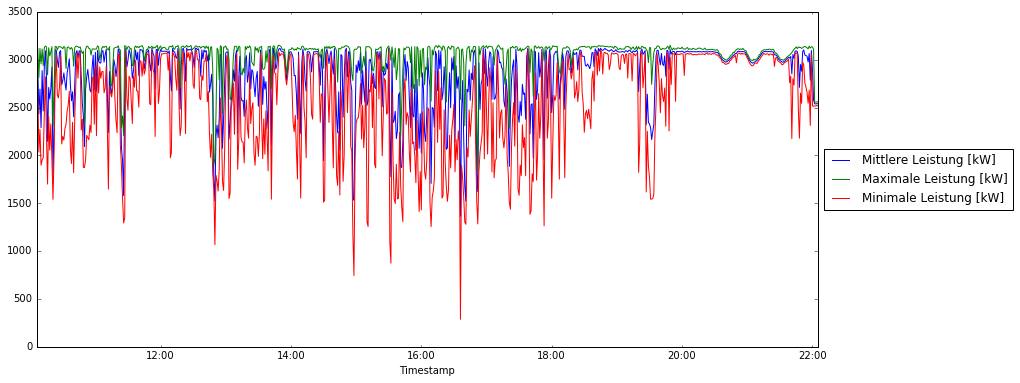

In [470]:
log_df[[u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]']].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

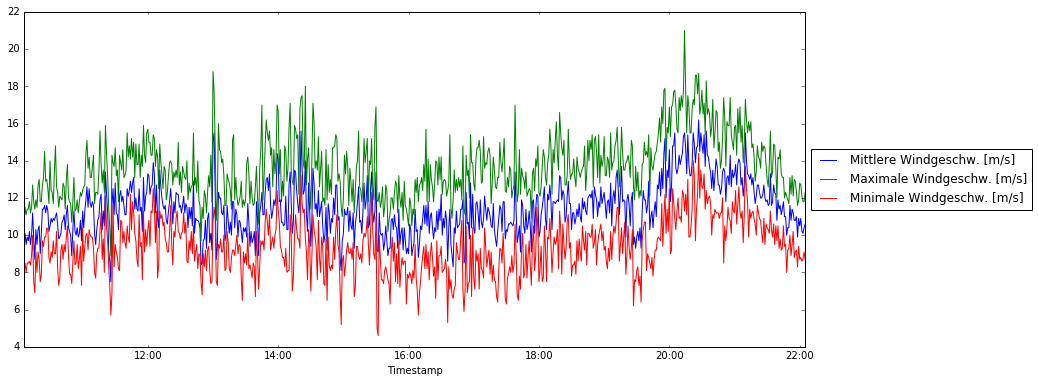

In [471]:
log_df[[u'Mittlere Windgeschw. [m/s]',
u'Maximale Windgeschw. [m/s]',
u'Minimale Windgeschw. [m/s]']].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

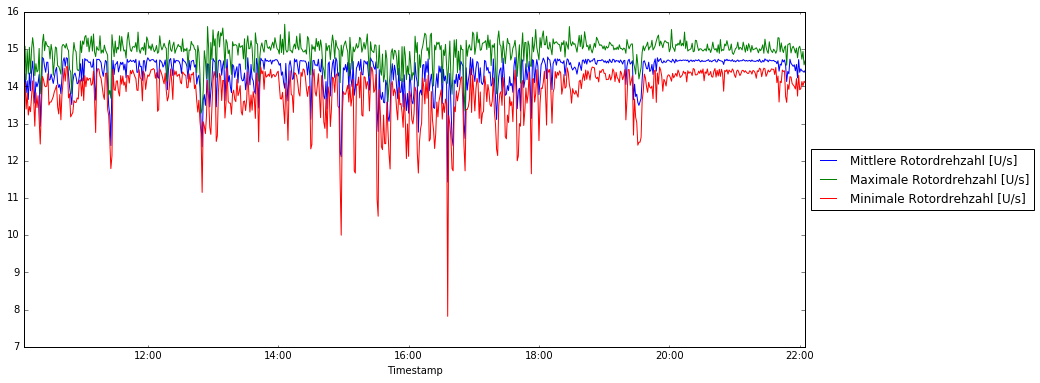

In [472]:
log_df[[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

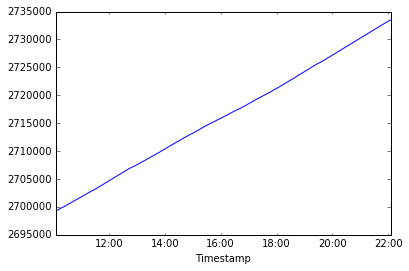

In [473]:
log_df[u'Produzierte Energie [kWh]'].plot();

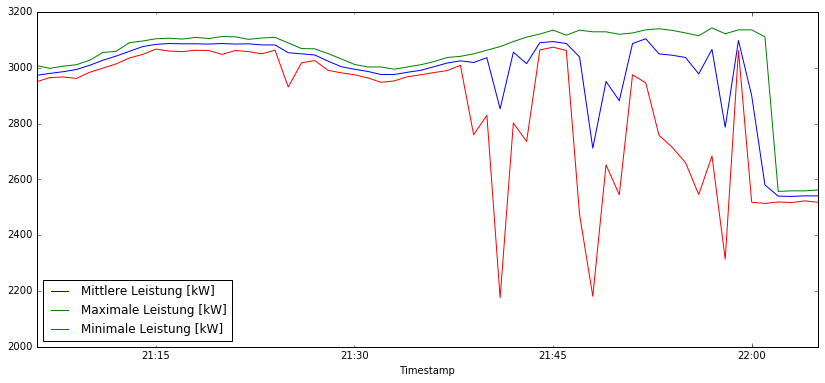

In [474]:
log_df[-60:][[u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]']].plot(figsize=(14,6));

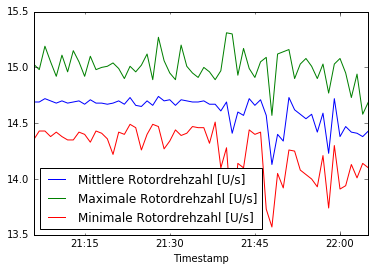

In [475]:
log_df[-60:][[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot();

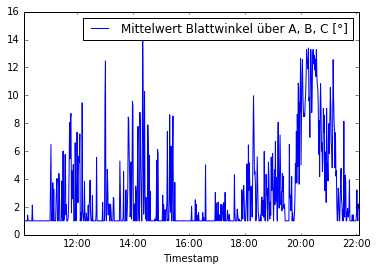

In [476]:
log_df[[u'Mittelwert Blattwinkel über A, B, C [°]']].plot();

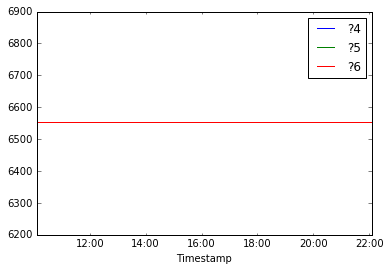

In [477]:
log_df[[u'?4',u'?5',u'?6']].plot();

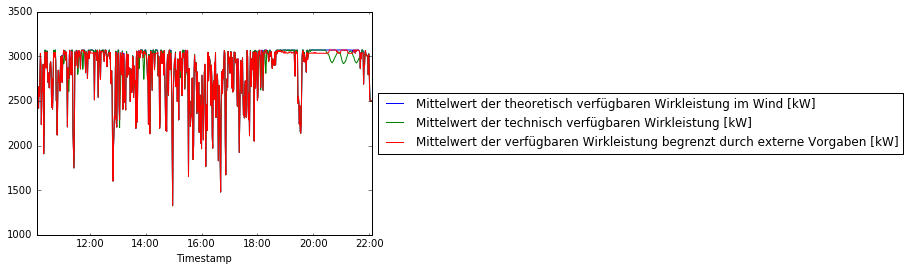

In [478]:
log_df[[u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));


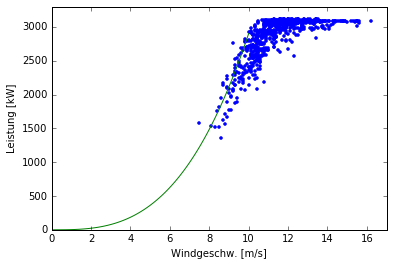

In [479]:
plt.plot(log_df[[u'Mittlere Windgeschw. [m/s]']],log_df[[u'Mittlere Leistung [kW]']],'.')
x1,x2,y1,y2 = plt.axis()
v=np.linspace(0,10,100)
power=2.9*v**3
plt.plot(v,power)
plt.axis((0,x2,0,3300));
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Leistung [kW]");

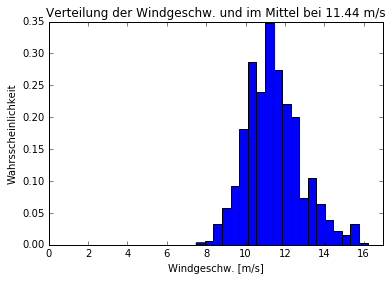

In [480]:
plt.hist(log_df[[u'Mittlere Windgeschw. [m/s]']].values,normed=True,bins=20);
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));
mean=log_df[[u'Mittlere Windgeschw. [m/s]']].mean().values[0]
plt.axvline(mean);
plt.title('Verteilung der Windgeschw. und im Mittel bei ' +"%.2f"% mean +" m/s")
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Wahrsscheinlichkeit"); #ToDo Weibull-Verteilung;

In [452]:
"Min: ","%.2f"%log_df[[u'Mittlere Windgeschw. [m/s]']].min()[0],\
"Mittelw.: ","%.2f"%log_df[[u'Mittlere Windgeschw. [m/s]']].mean()[0],\
"Max.: ","%.2f"%log_df[[u'Mittlere Windgeschw. [m/s]']].max()[0]

('Min: ', '7.50', 'Mittelw.: ', '10.50', 'Max.: ', '15.60')

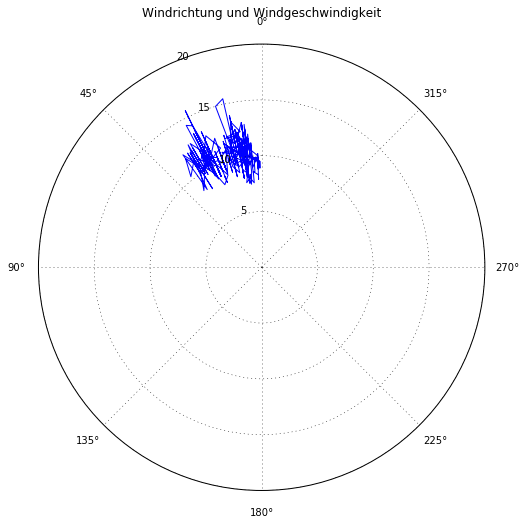

In [453]:
fig=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(np.pi+log_df[[u'Gondelposition [º]']].values*np.pi/180,log_df[[u'Mittlere Windgeschw. [m/s]']].values)
ax.set_theta_zero_location("N")
ax.set_rmax(20)
ax.grid(True)
plt.title('Windrichtung und Windgeschwindigkeit');

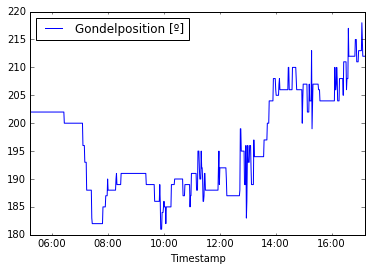

In [454]:
(log_df[[u'Gondelposition [º]']]%360).plot();

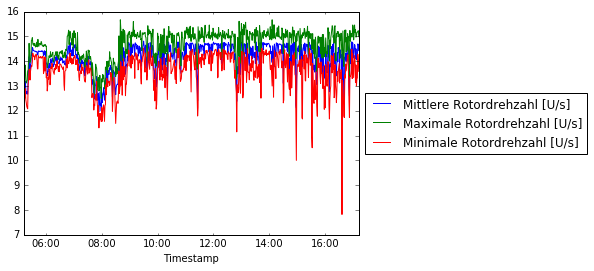

In [455]:
log_df[[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

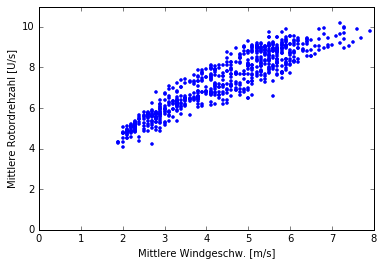

In [68]:
plt.plot(log_df[[u'Mittlere Windgeschw. [m/s]']].values  ,log_df[[u'Mittlere Rotordrehzahl [U/s]']].values,'.')
plt.xlabel(u'Mittlere Windgeschw. [m/s]')
plt.ylabel(u'Mittlere Rotordrehzahl [U/s]')
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));

In [69]:
xda.GetProperties([ItemContainer(ItemName='Loc/Loc/Wec/Plant2/Log/T101a1')])

OPCServerError: E_FAIL


In [ ]:
xda.Read(ItemContainer(ItemName='Loc/Wec/Plant2/Log/Wecstd/Day/Val-2',_Properties={'timestamp'}),ReturnItemTime=True)

In [273]:
ItemContainer(ItemName='Loc/Wec/Plant2/Log/Wecstd/Day/Val-2',_Properties={'timestamp'})

ItemContainer(ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val-2, IsEmpty=False, _Properties=set(['timestamp']))

In [74]:
log_df[[u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]']].min()

Mittlere Leistung [kW]    -6
Maximale Leistung [kW]    -2
Minimale Leistung [kW]   -24
dtype: float64

In [102]:
disk_engine = create_engine('sqlite:///egneos1.db')

In [105]:
log_df.to_sql('Wecstd', disk_engine, if_exists='append')

In [152]:
xda.Browse(ItemName='Loc/Wec/Plant2/Log/Wecstd/Day')

([ItemContainer(Name=Val, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val),
  ItemContainer(Name=NoVal, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/NoVal),
  ItemContainer(Name=Val-1, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val-1),
  ItemContainer(Name=Val-2, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val-2),
  ItemContainer(Name=Val-3, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val-3),
  ItemContainer(Name=Val-4, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day/Val-4),
  ItemContainer(Name=Val-5, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName

In [137]:
os.path.join(p,Tscales.Name,"RawSmpTime")

'Loc/Wec/Plant2/Log/T101a2/Day/RawSmpTime'

In [144]:
i=ItemContainer(ItemName='Loc/Wec/Plant2/Log/Wecstd/Day/Val-2',_Properties={'timestamp'})
i.ItemName.rsplit('/', 1)[1]

'Val-2'

In [169]:
(now-lastTS).total_seconds()

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'unicode'

In [190]:
(datetime.datetime(2016, 2, 13, 22, 14, 7)-datetime.datetime(2015, 12, 13, 22, 14, 4)).days//365

0

In [179]:
now.month

2

In [196]:
datetime.datetime(2016, 2, 13, 22, 14, 7)-datetime.datetime(2015, 12, 13, 22, 14, 4)

datetime.timedelta(62, 3)

In [194]:
start_date = datetime.date(2015, 10, 3)
start_date_monday = (start_date - datetime.timedelta(days=start_date.weekday()))

In [195]:
start_date_monday

datetime.date(2015, 9, 28)

In [197]:
start_date.month

10

In [232]:
int("Val-11".rsplit('-', 1)[1])<34

True

In [314]:
len(xda.Read(ItemContainer(ItemName='Loc/Wec/Plant2/Log/Wecstd/Week/Val-1'))[0][0].Value)

17

In [382]:
xx=xda.Browse(ItemName='Loc/Wec/Plant2/Log/Wecstd/Week',PropertyNames=[u'timestamp'],ReturnPropertyValues=True)

In [385]:
xx[0][0]._Properties

{QName(u'http://opcfoundation.org/webservices/XMLDA/1.0/', u'timestamp'): OPCProperty(QName(u'http://opcfoundation.org/webservices/XMLDA/1.0/', u'timestamp'), (2016, 2, 18, 11, 12, 0, 0, 0, 0), 'Item timestamp', 'Loc/Wec/Plant2/Log/Wecstd/Week/', 'Val', None, None)}

In [389]:
list(xx[0][0]._Properties)

[QName(u'http://opcfoundation.org/webservices/XMLDA/1.0/', u'timestamp')]